In [1]:
from Phosphorpy import DataSet
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
import numpy as np

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
coords = SkyCoord(
            np.array([114.084986, 247.083831, 211.73487])*u.deg,
            np.array([25.144718, 40.933285, -1.59471])*u.deg
)
tab = Table()
tab['ra'] = coords.ra.degree
tab['dec'] = coords.dec.degree
tab.write('./temp.fits', overwrite=True)
ds = DataSet.load_coordinates('./temp.fits')

**Phosphorpy** has also an interface to search and download spectra from GAMA, SDSS and LAMOST. As for the other interfaces, we keep it simple as possible.

To get all available spectra from all available sources, just write this

In [3]:
ds.spectra

SpectraList with 2 spectra.

and a SpectraList object with the spectra will be returned after all spectra are downloaded. Keep in mind, that this can take a while, specially if the initial DataSet contains a lot of coordinates.

A SpectraList object is the main container for all spectra. It handles the interaction with the single spectra, allows to add and/or merge other spectra or SpectraList objects. To access a individual spectra you can either do this

In [4]:
ds.spectra[0]

(Spectra with wavelength between 3815.926491189337 and 9206.6153750197 with a wavelength resolution of 1.41.,
 2)

which returns the first downloaded spectra and the corresponding ID in the DataSet or you take the spectra by its DataSet ID

In [5]:
ds.spectra.get_by_id(2)

SpectraList with 2 spectra.

which now would return a SpectraList object with all spectra of the target with this ID or None, if no corresponding spectra is available.

Also a spectra (and a light curve) can be accessed with their coordinates with the method get_spectra. This method takes as an input an astropy SkyCoord object or alternativly RA and Dec in degrees.

In [11]:
# with SkyCoord
s = SkyCoord(211.73487*u.deg, -1.559471*u.deg)
ds.get_spectra(s)
# direct
ds.get_spectra(ra=211.73487, dec=-1.559471)

SpectraList with 2 spectra.

### Plotting
As in the other sections the spectra-interface provides a basic plotting system.
For the spectra it is at the moment just a simple plot of the spectra with the option to plot multiple spectra in one figure and to restrict the wavelength-range.

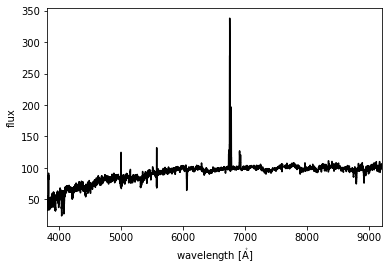

In [12]:
ds.spectra.plot.spectra(2)

The input here is the DataSet ID.

To plot multiple spectra simultaneously, the input must be a list of DataSet ID's

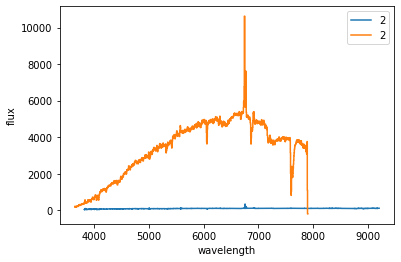

In [13]:
ds.spectra.plot.spectra([2])

In the last figure only one spectra is with its features visible. This is because a different unit system of both spectra.

It can be avoid, if the parameter 'normalize' is set to true.

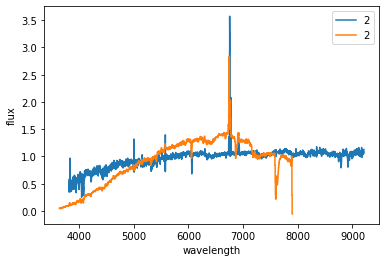

In [14]:
ds.spectra.plot.spectra([2], normalize=True)